# Chap 11 - Demo 1: Use sepal length and sepal width to classify iris data, use KMeansClustering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [4]:
iris = pd.read_excel('Iris.xls')

iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
inputs = iris[['sepallength', 'sepalwidth']]

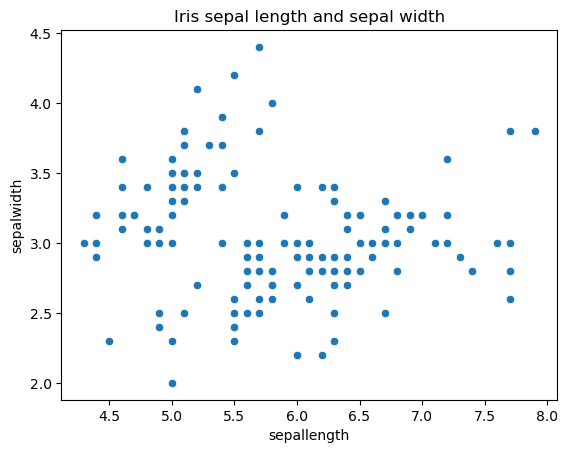

In [13]:
sbn.scatterplot(data = inputs, x = 'sepallength', y = 'sepalwidth')
plt.title('Iris sepal length and sepal width')
plt.show()

## <span style = 'color:yellow'> Build KMeansClustering model

In [43]:
# Find optimal k using Elbow Method
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_nums = range(2,10)

for k in k_nums:
    kmeansModel = KMeans(n_clusters = k)
    kmeansModel.fit(inputs)
    print(f'Silhouette score for k = {k}: {silhouette_score(inputs, kmeansModel.labels_)}')

print('\nChoose K = 2')

Silhouette score for k = 2: 0.46478573559804964
Silhouette score for k = 3: 0.4434693231245126
Silhouette score for k = 4: 0.4256887098746095
Silhouette score for k = 5: 0.39010869578258045
Silhouette score for k = 6: 0.3896605324600604
Silhouette score for k = 7: 0.37440443609150315
Silhouette score for k = 8: 0.37947053942352116
Silhouette score for k = 9: 0.3948234335138706

Choose K = 2


D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

In [38]:
# Build official KMeansClustering with K = 3

kmeansModel = KMeans(n_clusters = 2).fit(inputs)
centroids = kmeansModel.cluster_centers_
labels = kmeansModel.labels_

print('Coordinates of all centroids:\n', centroids)

inputs_group = inputs.copy()
inputs_group.insert(2, 'Group', labels)

inputs_group

Coordinates of all centroids:
 [[5.15       3.16216216]
 [6.51842105 2.94868421]]


D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepallength,sepalwidth,Group
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


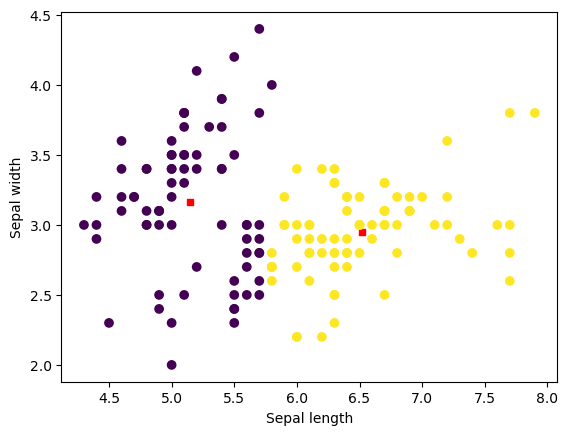

In [40]:
sbn.reset_orig()
plt.scatter(centroids[:,0], centroids[:,1], marker = 's', s = 15, color = 'red')
plt.scatter(inputs_group['sepallength'], inputs_group['sepalwidth'], c = inputs_group['Group'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Describe results:
## Group 0: SL < 5.75
## Group 1: SL > 5.75